## Tarea 1 
#### Fernando Morales B85338
#### Análisis exploratorio de datos

Para el análisis exploratorio de datos se utilizarán las siguientes 3 técnicas:

- **Estadística descriptiva:** es una técnica que plantea revisar, para las columnas que lo permitan, un resumen de 5 números: mínimo, primer cuartil, mediana, tercer cuartil y el máximo.
- **Particionamiento de clases**: es una técnca que decide partir el set de datos en categorías, por ejemplo: edad, sexo, ubicación, etc.
- **Visualización:** es una técnica que permite observar diferentes comportamientos a través de material visual, sean gráficos de todo tipo, imágenes que ayuden a explicar el *set de datos*, entre otros.

##### Inicio de EDA

Teniendo en mente las siguientes 3 preguntas:

- ¿Cuál es el país cuyo índice de obesidad ha aumentado porcentualmente más en hombres desde el 2006 hasta el 2016?
- ¿Cuál es el país con el índice promedio de obesidad menor para ambos sexos  entre el 2006 hasta el 2016?
- ¿Cuál es el país con el índice promedio de obesidad mayor en mujeres entre el 2006 hasta el 2016?

Empezaremos viendo la forma de los datos y del set de datos en general:

In [11]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pd.options.display.mpl_style = 'default'
plt.style.use('seaborn-whitegrid')

url = './clean_data.csv'
obesity_index = pd.read_csv(url, sep=',')

obesity_index

,Country,Year,Sex,Index average,Index Intervals
0,Afghanistan,2016,Both,5.5,[3.4-8.1]
1,Afghanistan,2016,Male,3.2,[1.3-6.4]
2,Afghanistan,2016,Female,7.6,[4.3-12.4]
3,Afghanistan,2015,Both,5.2,[3.3-7.7]
4,Afghanistan,2015,Male,3.0,[1.3-6.0]
...,...,...,...,...,...
6298,Zimbabwe,2007,Male,3.3,[1.9-5.4]
6299,Zimbabwe,2007,Female,21.3,[16.6-26.6]
6300,Zimbabwe,2006,Both,12.5,[10.0-15.4]
6301,Zimbabwe,2006,Male,3.2,[1.8-5.3]


Podemos observar que tenemos 5 columnas, donde las columnas `Country`, `Year` y `Sex` son categóricas, mientras que `Index average` y `Index intervals` son numéricas. Para nuestras preguntas de investigación, la columna `Index intervals` no tiene relevancia.

Siguiente, vamos a utilizar la **estadística descriptiva** para observar el comportamiento de la columna `Index intervals`:

In [13]:
obesity_index['Index average'].describe()

count    6303.000000
mean       17.764160
std        11.576327
min         0.600000
25%         7.800000
50%        18.000000
75%        23.700000
max        63.300000
Name: Index average, dtype: float64

Podemos observar cómo, entre el tercer cuartil y el máximo existe una gran separación del valor de los índices, mientras que podemos ver que la gran mayoría de los valores se encuentran alrededor de `18`.

Una vez realizado esto, usaremos la técnica de **visualización** para observar cómo se comporta esta variable con respecto a las demás variables y ver cómo, a través de los años, cambia la variable para un determinado país:

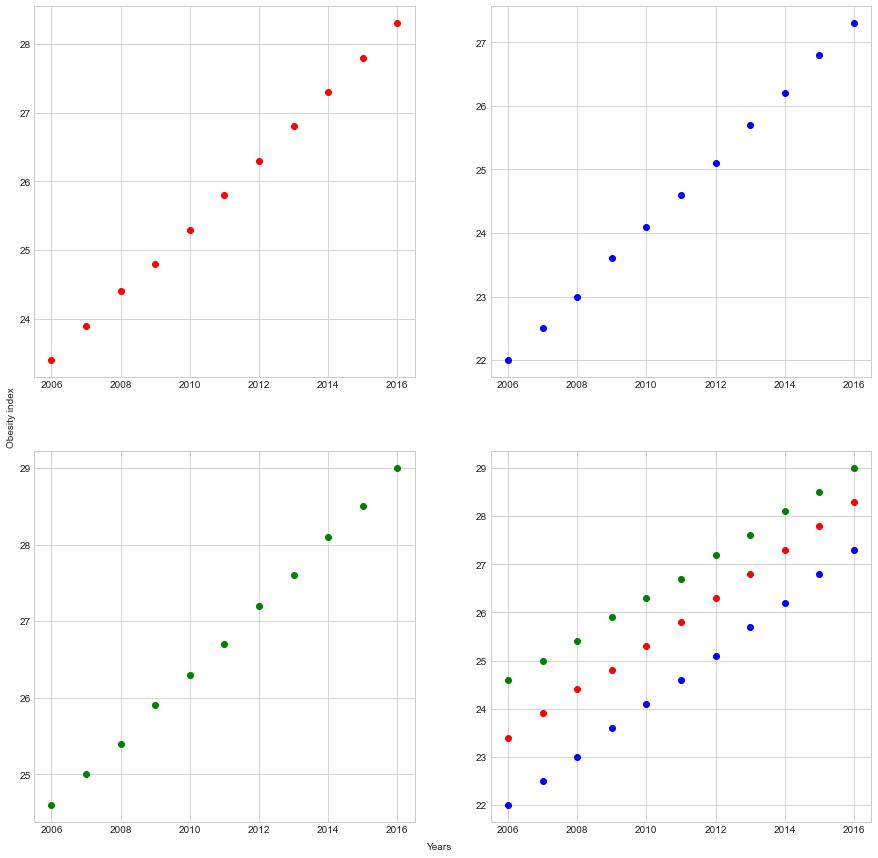

In [30]:
countries = obesity_index['Country'].unique()

for country in countries:
    #country_info = obesity_index.loc[obesity_index['Country'] == country].plot(x = 'Year', y = 'Index average')
    country_info = obesity_index.loc[obesity_index['Country'] == country]
    country_info_both_sexes = country_info.loc[country_info['Sex'] == 'Both']
    country_info_male = country_info.loc[country_info['Sex'] == 'Male']
    country_info_female = country_info.loc[country_info['Sex'] == 'Female']
    if(country == 'Argentina'): 
        figure, axis = plt.subplots(2,2)
        axis[0,0].scatter(country_info_both_sexes['Year'], country_info_both_sexes['Index average'], c='red')
        axis[0,1].scatter(country_info_male['Year'], country_info_male['Index average'], c='blue')
        axis[1,0].scatter(country_info_female['Year'], country_info_female['Index average'], c='green')
        axis[1,1].scatter(country_info_both_sexes['Year'], country_info_both_sexes['Index average'], c='red')
        axis[1,1].scatter(country_info_male['Year'], country_info_male['Index average'], c='blue')
        axis[1,1].scatter(country_info_female['Year'], country_info_female['Index average'], c='green')
        figure.text(0.5, 0.1, 'Years', ha='center')
        figure.text(0.1, 0.5, 'Obesity index', va='center', rotation='vertical')
        figure.set_figheight(15)
        figure.set_figwidth(15)
        plt.show()          
        

Como se puede observar en los gráficos, se nota que el índice de obesidad promedia va aumentando a través de los años, sin importar el sexo. De igual forma, parecen tener una pendiente muy similar entre todas las categorías de sexo. 

#### Pregunta 1

Para responder la primer pregunta de investigación, se filtró el *dataset* por el sexo correspondiente para cada uno de los países, a través de la técnica de **particionamiento de clases**. Luego, se calculó el porcentaje de aumento del índice de obesidad en 2006 a 2016 y se fue seleccionando el mayor aumento.

The country with the biggest obesity index increase is Viet Nam with a percent increase of 166.66666666666669%
Viet Nam's 2006 obesity index for both sexes was: 0.6
Viet Nam's 2016 obesity index for both sexes was: 1.6


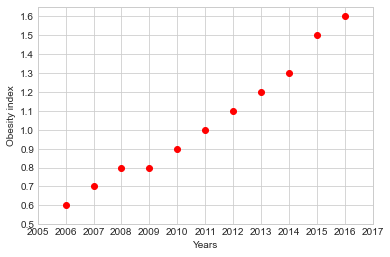

In [16]:
max_country = countries[0]
max_percent = 0
max_2006 = 0
max_2016 = 0
max_country_info = []
for country in countries:
    country_info = obesity_index.loc[obesity_index['Country'] == country]
    country_info_male = country_info.loc[country_info['Sex'] == 'Male']
    country_info_male_2006 = country_info_male.loc[country_info_male['Year'] == 2006]['Index average']
    country_info_male_2016 = country_info_male.loc[country_info_male['Year'] == 2016]['Index average']
    number_2006 = country_info_male_2006.sum()
    number_2016 = country_info_male_2016.sum()
    percent = ((number_2016 - number_2006)/number_2006)*100
    if percent > max_percent:
        max_country = country
        max_percent = percent
        max_2006 = number_2006
        max_2016 = number_2016        
        max_country_info = country_info_male
print('The country with the biggest obesity index increase is ' + max_country + ' with a percent increase of {0}'.format(max_percent) + '%')
print(max_country + '\'s 2006 obesity index for both sexes was: {0}'.format(max_2006))
print(max_country + '\'s 2016 obesity index for both sexes was: {0}'.format(max_2016))  

plt.plot(max_country_info['Year'],
         max_country_info['Index average'], 'ro')
plt.xlim(2006,2016);
plt.xticks(range(2005,2018))
plt.yticks(np.arange(0.5,1.7,0.1))
plt.xlabel('Years')
plt.ylabel('Obesity index')
plt.show()


Se puede observar que, a pesar de que, comparativamente, el aumento de índice de Vietnam fue pequeño, como Vietnam ya tenía un índice pequeño, el aumento porcentual es realmente grande relativamente. El gráfico ayuda a ver este crecimiento a través de los años. 

#### Pregunta 2

Para responder la segunda pregunta de investigación, se llevó a cabo un proceso muy similar al de la pregunta 1, usando ambas técnicas de **visualización** y **particionamiento de clases**: se filtró por el sexo para cada país, para luego obtener todos los valores de índices de obesidad a través de los años y calcular su promedio. Una vez obtenido el promedio, se compara con el país previamente escogido y, de ser menor, se guarda el valor correspondiente. 


The country with the lowest average obesity index for both sexes is Viet Nam with the smallest obesity index average of 1.518181818181818.


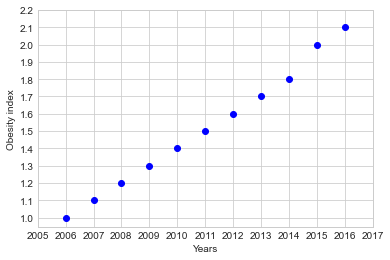

In [17]:
min_country = countries[0]
min_average = 100
min_country_info = []
year_count = obesity_index['Year'].unique().size
for country in countries:
    country_info = obesity_index.loc[obesity_index['Country'] == country]
    country_info_male = country_info.loc[country_info['Sex'] == 'Both']
    average_sum = 0
    for average in country_info_male['Index average']:
        average_sum += average
    average_sum /= year_count
    if average_sum < min_average:
            min_country = country
            min_average = average_sum
            min_country_info = country_info_male
print('The country with the lowest average obesity index for both sexes is ' + min_country + ' with the smallest obesity index average of {0}'.format(min_average) + '.')

plt.plot(min_country_info['Year'],
         min_country_info['Index average'], 'bo')
plt.xlim(2006,2016);
plt.xticks(range(2005,2018))
plt.yticks(np.arange(1.0,2.2,0.1))
plt.xlabel('Years')
plt.ylabel('Obesity index')
plt.show()


Al igual que la primera pregunta, Vietnam es el país con el menor índice promedio de obesidad para ambos sexos. En el gráfico, podemos observar que el mínimo índice de obesidad fue `1.0` en el 2006 y `2.1` fue el máximo en el 2016.

#### Pregunta 3

Similar a las primeras dos preguntas, se usaron las técnicas de **visualización** y **particionamiento de clases** para responderla: se filtra para cada país por el sexo correspondiente, para luego obtener los índices de obesidad de cada año. Estos son usados para calcular el promedio a través de la década y se busca el país con el mayor promedio de índice de obesidad en mujeres.

The country with the highest average obesity index on females is Nauru with the greatest obesity index average of 62.118181818181824.


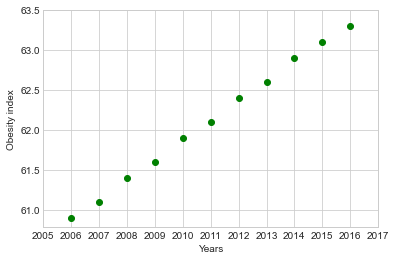

In [59]:
## pregunta 3
#- Cuál es el país con el índice promedio de obesidad mayor en mujeres entre el 2006 hasta el 2016?

max_country = countries[0]
max_average = 0
max_country_info = []
year_count = obesity_index['Year'].unique().size
for country in countries:
    country_info = obesity_index.loc[obesity_index['Country'] == country]
    country_info_female = country_info.loc[country_info['Sex'] == 'Female']
    average_sum = 0
    for average in country_info_female['Index average']:
        average_sum += average
    average_sum /= year_count
    if average_sum > max_average:
            max_country = country
            max_average = average_sum
            max_country_info = country_info_female
print('The country with the highest average obesity index on females is ' + max_country + ' with the greatest obesity index average of {0}'.format(max_average) + '.')

plt.plot(max_country_info['Year'],
         max_country_info['Index average'], 'go')
plt.xlim(2006,2016);
plt.xticks(range(2005,2018))
plt.yticks(np.arange(61,64.0,0.5))
plt.xlabel('Years')
plt.ylabel('Obesity index')
plt.show()


`Nauru` fue el país con mayor índice de obesidad en mujeres en la década correspondiente, con un promedio de `62.12`. Podemos observar como, en la gráfica, más del 60% de mujeres son clasificadas como obesas en todos los años donde se esté aplicando este estudio.

#### Atributos problemáticos

El atributo compuesto `Index intervals` realmente es el atributo que no aporta mucho a la investigación. Está compuesto por dos atributos: 

- *Minimum obesity index*
- *Maximum obesity index*

A pesar de esto, no significa que estos atributos no tengan valor; si no que en el contexto de estas preguntas de investigación, no aportan ninguna información que ayude a contestar las preguntas.

En comparación, todos los demás atributos son vitales para responder las preguntas de investigación, ya que los categóricos permiten la organización de los datos, mientras que la columna `Index average` contiene el dato pivotal de este *dataset*.